# Instructions
* You must work on this assignment individually.
* This assignment contributes 20% towards your final mark in FIT5211.
* The subjects are sorting, trees and dynamic programming.
* The exercises are roughly given by increasing difficulty.
* You may create auxiliary/helper functions for each question, as long as you use the pre-defined functions, if any is given.
* Unit tests have only been provided for Exercise 1. You will need to write your own tests when they are not provided. 
* The expected deliverable is this Jupyter Notebook, completed with your answers.
* For questions on this assigment, please use the Moodle forum https://moodle.vle.monash.edu/mod/forum/view.php?id=4764773.
* The deadline is May 25, 23:55 via Moodle: https://moodle.vle.monash.edu/course/view.php?id=42910&section=5#5. If this does not work, and only in this case, send your Notebook to pierre.lebodic@monash.edu.
* The late penalty is 10 marks (deducted from your original mark) per late day

# Exercise 1: Sorting Lists of Pairs (50 marks)

(Note that in this exercise, questions may be attempted without having completed all previous questions)

Consider the abstract Python class below:

In [2]:
class Comparison:
    def __init__(self):
        pass
    
    #returns True if the two objects are comparable,
    #False otherwise
    def areComparable(self, other):
        raise Exception("NotImplementedException")
        
    #returns True if the two objects are equal,
    #False otherwise
    def __eq__(self, other):
        raise Exception("NotImplementedException")
   
    #returns True if self > other,
    #False otherwise
    def __gt__(self, other):
        raise Exception("NotImplementedException")
        
    #returns True if self < other,
    #False otherwise
    def __lt__(self, other):
        raise Exception("NotImplementedException")    
        
    def __ne__(self, other):
        return not self.__eq__(other)
                
    def __ge__(self, other):
        return self.__eq__(other) or self.__gt__(other)

    def __le__(self, other):
        return self.__eq__(other) or self.__lt__(other)
        
    def compare(self, other):
        if self.areComparable(other) is False:
            return None
        elif self == other:
            return 0
        elif self < other:
            return -1
        elif self > other:
            return 1
        else:
            assert False, "Inconsistent operation definitions"

The Comparison class provides a way to model items that are not always comparable. For instance, the pair of integers $(5, 10)$ is greater than $(4, 8)$, but it is not comparable to $(6, 5)$, because $5 < 6$ and $10 > 5$.

In this exercise, we will look into different ways to sort list of pairs. We will suppose that the pairs in a list are all different.  

## Question 1.1 (10 marks)

The rules of comparison between two Pairs $(a, b)$ and $(c, d)$ are:
* $(a, b) == (c, d)$ if and only if $a == c$ and $b == d$,
* $(a, b) > (c, d)$ if and only if ($a > c$ and $b \geq d$) or ($a \geq c$ and $b > d$),
* $(a, b) < (c, d)$ if and only if ($a < c$ and $b \leq d$) or ($a \leq c$ and $b < d$).

We say that $(a, b)$ and $(c, d)$ are comparable if 
* $(a, b) == (c, d)$, or
* $(a, b) > (c, d)$, or
* $(a, b) < (c, d)$.

We ask that you implement the rules above in the class called Pair below, by completing the functions that have a comment "#TODO" in the body. Note that the class Pair inherits from Comparison.

In [3]:
class Pair(Comparison):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return "({},{})".format(self.x, self.y)
        
    def areComparable(self, other):
        if self.__eq__(other) or self.__gt__(other) or self.__lt__(other):
            return True
        return False
        
    def __eq__(self, other):
        return self.x == other.x and self.y==other.y
    
    def __gt__(self, other):
        if (self.x >= other.x and self.y>other.y) or(self.x>other.x and self.y>=other.y):
            return True
        else:
            return False
        
    def __lt__(self, other):
        if (self.x <= other.x and self.y<other.y) or(self.x<other.x and self.y<=other.y):
            return True
        else:
            return False

We provide a test class below. You don't need to edit it, but the class Pair you write need pass these tests! 

In [4]:
import unittest

class TestPair(unittest.TestCase):
    def setUp(self):
        self.v00 = Pair(0,0)
        self.v01 = Pair(0,1)
        self.v10 = Pair(1, 0)
        self.v11 = Pair(1, 1)
        self.v21 = Pair(2, 1)
        self.v31 = Pair(3, 1)
        self.v23 = Pair(2, 3)
        self.v23other = Pair(2, 3)
    
    def test_areComparable(self):
        self.assertTrue(self.v00.areComparable(self.v01))
        self.assertTrue(self.v01.areComparable(self.v00))
        
        self.assertTrue(self.v11.areComparable(self.v00))
        self.assertTrue(self.v00.areComparable(self.v11))
        
        self.assertTrue(self.v21.areComparable(self.v23))
        self.assertTrue(self.v23.areComparable(self.v21))
        
        self.assertTrue(self.v23.areComparable(self.v23))
        
        self.assertTrue(self.v23.areComparable(self.v23other))
        self.assertTrue(self.v23other.areComparable(self.v23))
        
        self.assertFalse(self.v01.areComparable(self.v10))
        self.assertFalse(self.v10.areComparable(self.v01))
        
        self.assertFalse(self.v31.areComparable(self.v23))
        self.assertFalse(self.v23.areComparable(self.v31))
    
    def test_eq(self):
        self.assertTrue(self.v00 == self.v00)
        self.assertTrue(self.v21 == self.v21)
        self.assertTrue(self.v23 == self.v23)
        self.assertTrue(self.v23 == self.v23other)
        
        self.assertFalse(self.v00 == self.v11)
        self.assertFalse(self.v21 == self.v11)
        self.assertFalse(self.v21 == self.v23)
    
    def test_ne(self):
        self.assertFalse(self.v00 != self.v00)
        self.assertFalse(self.v21 != self.v21)
        self.assertFalse(self.v23 != self.v23)
        self.assertFalse(self.v23 != self.v23other)
        
        self.assertTrue(self.v00 != self.v11)
        self.assertTrue(self.v21 != self.v11)
        self.assertTrue(self.v21 != self.v23)
    
    def test_gt(self):
        self.assertTrue(self.v01 > self.v00)
        self.assertTrue(self.v10 > self.v00)
        self.assertTrue(self.v31 > self.v21)
        
        self.assertFalse(self.v00 > self.v01)
        self.assertFalse(self.v00 > self.v01)
        self.assertFalse(self.v21 > self.v31)
        
        self.assertFalse(self.v10 > self.v01)
        self.assertFalse(self.v01 > self.v10)
        self.assertFalse(self.v31 > self.v23)
        self.assertFalse(self.v23 > self.v31)
    
    def test_lt(self):
        self.assertFalse(self.v01 < self.v00)
        self.assertFalse(self.v10 < self.v00)
        self.assertFalse(self.v31 < self.v21)
        
        self.assertTrue(self.v00 < self.v01)
        self.assertTrue(self.v00 < self.v01)
        self.assertTrue(self.v21 < self.v31)
        
        self.assertFalse(self.v10 < self.v01)
        self.assertFalse(self.v01 < self.v10)
        self.assertFalse(self.v31 < self.v23)
        self.assertFalse(self.v23 < self.v31)    

In [5]:
test = TestPair()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.001s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

In the following questions, we suppose that we have a set of Pairs, and that not every two pairs in that set are comparable.

## Question 1.2 (10 marks)

Given a list $l$ of Pairs in no particular order, use a sorting algorithm similar to *selection sort* to sort $l$ such that, at the end of the algorithm, for every two pairs $l[i]=(a, b)$ and $l[j]=(c, d)$ at index $i$ and $j$ in $l$, respectively, with $i <j$, we have:
* either $(a, b) \leq (c, d)$,
* or $(a, b)$ and $(c, d)$ are not comparable.

In [6]:
def pairSort(l):
    for i in range(0,len(l)-1):
        min_idx = i
        for j in range(i+1, len(l)):
            if l[j]<=l[min_idx]:
                min_idx = j
        l[i],l[min_idx] = l[min_idx], l[i]

Again, we provide a test class below. You don't need to edit it, but the method pairsort you wrote needs to pass these tests! 

In [7]:
import unittest
import random

class TestPairSort(unittest.TestCase):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = pairSort
    
    def test1(self):
        #in this test we suppose x=0 for all entries
        #this means that the algorithm should do a regular bubble sort
        #we also suppose everything is already ordered
        l = [self.PairClass(0, 1), self.PairClass(0, 3), self.PairClass(0, 4), self.PairClass(0, 6), 
            self.PairClass(0, 8), self.PairClass(0, 15), ]
        self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(l)
            
    def test2(self):
        #in this test we suppose x=0 for all entries
        #this means that the sort algorithms should do a "regular" sort
        l = [self.PairClass(0, 8), self.PairClass(0, 4), self.PairClass(0, 3), self.PairClass(0, 9), 
            self.PairClass(0, 10), self.PairClass(0, 5), ]
        self.sortAlgo(l)
        #for item in sortedl: print(item)
        self.checkorder(l)

            
    def test3(self):
        #in this test we suppose x and y are not fixed
        #we also suppose that everything is in a good order
        l = [self.PairClass(5, 8), self.PairClass(5, 10), self.PairClass(6, 10), self.PairClass(7, 12), 
            self.PairClass(5, 12), self.PairClass(9, 12), ]
        sortedl = self.sortAlgo(l)
        #for item in sortedl: print(item)
        self.checkorder(l)
        
    def test4(self):
        #in this test we suppose x and y are not fixed
        #we suppose there is no two pairs that are comparable
        l = [self.PairClass(8, 8), self.PairClass(5, 10), self.PairClass(10, 8), self.PairClass(12, 5)]
        self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(l)
        
    def test5(self):
        #in this test we suppose x and y are not fixed
        #the input is in arbitrary order
        #we only test one case
        l = [self.PairClass(5, 8), self.PairClass(10, 10), self.PairClass(12, 5), self.PairClass(9, 5),
             self.PairClass(5, 10), self.PairClass(7, 2), self.PairClass(6, 10) ]
        self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(l)
    
    def test6(self):
        #in this test we suppose x and y are not fixed
        #the input is in arbitrary order
        #we generate many cases
        for size in range(0, 100):
            #create a list
            l = []
            xs = random.sample(range(0, 100), size)
            xy = random.sample(range(0, 100), size)
            for i in range(0, size):
                l.append(self.PairClass(xs[i], xy[i]))
            self.sortAlgo(l)
            #for item in l: print(item)
            self.checkorder(l)
        
    def checkorder(self, l):
        for i in range(0, len(l)-1):
            for j in range(i, len(l)-1):
                if l[i].areComparable(l[j]):
                    self.assertTrue(l[i] <= l[j], "{} and {} are not well ordered".format(l[i], l[j]) )

In [8]:
test = TestPairSort()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 0.758s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Question 1.3 (5 marks)

Suppose we have a list of Pairs of integers.
We want to implement a comparison mechanism between two pairs of integers using a function **pairKey**, which takes a pair as input and outputs a single number. The function pairKey should be such that for two pairs $(a, b)$ and $(c, d)$,
* $(a,b) > (c,d)$ implies $pairKey((a,b)) > pairKey((c,d))$,
* $(a,b) < (c,d)$ implies $pairKey((a,b)) < pairKey((c,d))$,
* $(a,b) == (c,d)$ implies $pairKey((a,b)) == pairKey((c,d))$.

In [9]:
def pairKey(self):
    result = self.x+self.y
    return result

If you have defined the function pairKey correctly, we should now be able to use the built-in sort function of Python to sort our Pairs:

In [10]:
def pairSortWithKey(l):
    l.sort(key = pairKey)

(For more information on what the above does, please refer to https://docs.python.org/3/howto/sorting.html)

In [11]:
class TestKeyPairSort(TestPairSort):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = pairSortWithKey

In [12]:
test = TestKeyPairSort()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 0.656s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Question 1.4 (5 marks)

Prove that the pairKey function you have defined above provides a guarantee that, if used as key for Python's sort, then the list will be sorted as stated in Queston 1.2.

the key transom function is,pairKey, use x plus y as commpareable object, if which is comparable, that means add attribute element x and y eihter grater than another or less than another, except that, equal obviously. If its elements are equal, Python's sort function is stability.

## Question 1.5 (5 marks)

(We have *not* covered the concept of stability in this unit. If you are not yet familiar with this concept, learning about it is part of the question.)

Use the fact that Python's sort is stable to provide a simple solution to sort a list of pairs as stated in Question 1.2. Use unit testing as in the previous questions to test your solution. Both your solution and the unit testing will be assessed. (no need to rewrite *new* test cases; use the old ones).

In [13]:
def pairSortUsingStability(l):
    for i in range(len(l)-1):
        for j in range(i+1,len(l)-1):
            if l[i]>l[j]:
                l[i],l[j] = l[j],l[i]

In [14]:
#operator '>' has been reloading
Pair(5,4)>Pair(4,5)

False

In [15]:
class TestPairSortUsingStability(TestPairSort):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = pairSortUsingStability

In [16]:
test = TestPairSortUsingStability()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 0.709s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Question 1.6 (10 marks)

Define a function pairSortFast that takes a list $l$ of $n$ Pairs as input and sort this list in $O(n)$ time in the worst case (not the amortised worst case). Suppose that any pair $(a,b)$ in $l$ is such that $a$ and $b \in \{0, \dots, U\}$, where $U$ is a small integer. Hint: *a clever hashing function* may help.

In [17]:
def PairSortFast(array):
    l = 0; r= len(array)-1
    if l >= r:
        return
    stack = []
    stack.append(l)
    stack.append(r)
    while stack:
        low = stack.pop(0)
        high = stack.pop(0)
        if high - low <= 0:
            continue
        x = array[high]
        i = low - 1
        for j in range(low, high):
            if array[j] <= x:
                i += 1
                array[i], array[j] = array[j], array[i]
        array[i + 1], array[high] = array[high], array[i + 1]
        stack.extend([low, i, i + 2, high])

In [18]:
class TestPairSortFast(TestPairSort):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = PairSortFast

In [19]:
test = TestPairSortFast()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 0.641s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Question 1.7 (5 marks)

Thoroughly benchmark all the sorting algorithms you have written, and plot their running time as a function of the size of the input list. You may use methods and code seen in the lectures or tutes and pracs during the semester.

In [27]:


import time
import numpy as np

def running_time(list, algorithm):
    start = time.clock()
    algorithm(list)#Q 1.2
    end = time.clock()
    return float(end-start)
    
def init_analysisdata(list_collections):
    sta_dic = {}
    for algorithm in [pairSort, pairSortWithKey, pairSortUsingStability, PairSortFast]:
        running_time_list = []
        for list in list_collections:
            list_len = len(list)
            runtime = running_time(list, algorithm)
            tmp = [list_len, runtime]
            running_time_list.append(tmp)
        sta_dic[algorithm.__name__] = np.array(running_time_list)
    return sta_dic

In [21]:
l1 = [Pair(0, 1), Pair(0, 2), Pair(0, 4), Pair(0, 6), Pair(0, 8), Pair(0, 15) ]

l2 = [Pair(-2,-3),Pair(-5,-6),Pair(-2,-7),Pair(0,1),Pair(1,1),Pair(-7,-3),Pair(-7,-6),Pair(-4,-7),Pair(0,2),Pair(7,1)]

l3 = [Pair(-2,-3),Pair(-5,-6),Pair(-2,-7),Pair(0,1),Pair(1,1),Pair(-5,-3),Pair(-3,-6),Pair(-2,-7),Pair(4,1),Pair(6,1),
      Pair(-8,-3),Pair(-9,-6),Pair(-5,-7),Pair(8,1),Pair(1,4)]

l4 = [Pair(-2,-3),Pair(-59,-6),Pair(-2,-7),Pair(0,1),Pair(5,1),Pair(-2,-3),Pair(-5,-6),Pair(-5,-7),Pair(0,1),Pair(1,1),
     Pair(-2,-3),Pair(-50,-6),Pair(-9,-7),Pair(0,1),Pair(35,1),Pair(-2,-3),Pair(-56,-6),Pair(-200,-7),Pair(0,1),Pair(1,1)]

list_collections = [l1, l2, l3,l4]

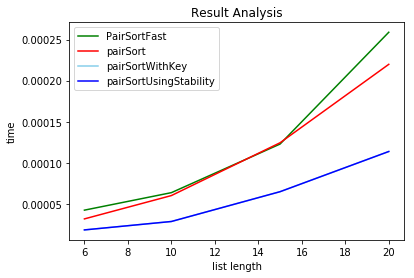

In [30]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


#sub_axix = filter(lambda x:x%200 == 0, x_axix)
plt.title('Result Analysis')
sta_dic = init_analysisdata(list_collections)

pair_sort_fast_result = sta_dic['PairSortFast']
pair_sort_result = sta_dic['pairSort']
pairSortWithKey_result = sta_dic['pairSortWithKey']
pairSortUsingStability_result = sta_dic['pairSortUsingStability']

plt.plot(pair_sort_fast_result[:,0], pair_sort_fast_result[:,1], color='green', label='PairSortFast')
plt.plot(pair_sort_result[:,0], pair_sort_result[:,1], color='red', label='pairSort')
plt.plot(pairSortWithKey_result[:,0], pairSortUsingStability_result[:,1],  color='skyblue', label='pairSortWithKey')
plt.plot(pairSortUsingStability_result[:,0], pairSortUsingStability_result[:,1], color='blue', label='pairSortUsingStability')
plt.legend() # 显示图例

plt.xlabel('list length')
plt.ylabel('time')
plt.show()

# Exercise 2 (25 marks)

We are again interested in lists of pairs of integers. However, this time, we want to store these pairs into a rooted tree $T$. More precisely, each node of $T$ will store a pair of $l$. This tree $T$ will have the property that for each inner node $k$ that stores a pair $(a, b)$, the pair $(c, d)$ stored at a node in the subtree of $k$ satisfies $(a, b) \leq (c, d)$. Furthermore, the pairs stored at sibling nodes must be non-comparable.

We will suppose that the root of the tree is a dummy pair $(-1, -1)$.

You need to provide a unit test for each question in this exercise where code is required. Each question is evaluated on the correctness of your code and the thoroughness of your unit tests.

## Question 2.1 (10 marks)

Define a class that stores the tree $T$ for any given list of pairs. The \_\_init\_\_() function must take a list as input and build the tree accordingly. An insert() function must allow the insertion of a pair to an initialised tree. In $O()$, what is the running time complexity of the functions you defined?

In [ ]:
class Node:
    def __init__(self,data):
        self.data = data
        self.lchild = None
        self.rchild = None

class BST(Pair):
    def __init__(self,node_list):
        self.root = Node(Pair(-1,-1))
        for node in node_list:
            self.insert(node)

    def search(self,data):
        bt = self.root
        while bt:
            entry = bt.data
            if data < entry:
                bt = bt.lchild
            elif data > entry:
                bt = bt.rchild
            else:
                return entry
        return False

    def insert(self,data):
        bt = self.root
        if not bt:
            self.root = Node(data)
            return
        while True:
            entry = bt.data
            if data < entry:
                if bt.lchild is None:
                    if bt.rchild is not None and bt.rchild.data.areComparable(data):
                        return
                    bt.lchild = Node(data)
                    return
                bt = bt.lchild
            elif data > entry:
                if bt.rchild is None:
                    if bt.lchild is not None and bt.lchild.data.areComparable(data):
                        return
                    bt.rchild = Node(data)
                    return
                bt = bt.rchild
            else:
                bt.data = data
                return

In [ ]:
#l = [Pair(0, 1), Pair(0, 2), Pair(0, 4), Pair(0, 6), 
#           Pair(0, 8), Pair(0, 15) ]
#l2 = [Pair(-2,-3),Pair(-5,-6),Pair(-2,-7),Pair(0,1),Pair(1,1)]

In [ ]:
import unittest
import random

tree_list = []
def front_visit(root):
    if root == None:
        return
    tree_list.append(root.data)
    front_visit(root.lchild)
    front_visit(root.rchild)

class TestBST(unittest.TestCase):
    def setUp(self):
        self.PairClass = Pair
        self.Tree = BST
    
    def test_insert(self):
        #in this test we suppose x=0 for all entries
        #this means that the algorithm should do a regular bubble sort
        #we also suppose everything is already ordered
        l = [self.PairClass(0, 1), self.PairClass(0, 3), self.PairClass(0, 4), self.PairClass(0, 6), 
            self.PairClass(0, 8), self.PairClass(0, 15)]
        T = self.Tree(l)
        front_visit(T.root)
        #for item in l: print(item)
        self.checkNodes(l,tree_list)
    
    def checkNodes(self, std_list, tree2list):
        for i in range(0, len(std_list)-1):
            self.assertTrue(std_list[i] == tree2list[i+1], "{} and {} are not well ordered".format(std_list[i], tree_list[i]) )
            

In [ ]:
test = TestBST()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

## Question 2.2 (5 marks)

In the class you have defined in Question 2.1, can there be multiple trees that store the same list of pairs? (including after insertions?). Prove your answer.

### Yes, multiple trees could be stored in the same list of pairs. the single three as an element of a forest, split threes by root node. Save all of them in the same list coule be implementation 

## Question 2.3 (5 marks)

We now relax the constraint that $T$ must be "exactly" a tree. A child node which stores a pair $(c, d)$ must now have as a parent all the nodes that have a pair $(a, b)$ such that $(a,b)\leq(c,d)$.

Design a class (it may be based on the previous one) to allow and build this representation.

In [ ]:
class Node:
    def __init__(self,data):
        self.data = data
        self.lchild = None
        self.rchild = None
        self.parent = None

class BST(Pair):
    def __init__(self,node_list):
        self.root = Node(Pair(-1,-1))
        for node in node_list:
            self.insert(node)

    def search(self,data):
        bt = self.root
        while bt:
            entry = bt.data
            if data < entry:
                bt = bt.lchild
            elif data > entry:
                bt = bt.rchild
            else:
                return entry
        return False

    def insert(self,data):
        bt = self.root
        if not bt:
            self.root = Node(data)
            return
        while True:
            entry = bt.data
            if data < entry:
                if bt.lchild is None:
                    if bt.rchild is not None and bt.rchild.data.areComparable(data):
                        return
                    bt.lchild = Node(data)
                    bt.lchild.parent = bt
                    return
                bt = bt.lchild
            elif data > entry:
                if bt.rchild is None:
                    if bt.lchild is not None and bt.lchild.data.areComparable(data):
                        return
                    bt.rchild = Node(data)
                    bt.rchild.parent = bt
                    return
                bt = bt.rchild
            else:
                bt.data = data
                return

## Question 2.4 (5 marks)

Using the class written in Question 2.3, design and code an algorithm that traverses all the nodes in that data structure and outputs the stored pairs in sorted order (as defined in Question 1.2).

In [ ]:
def OutputSortedPairs(root):
    if root == None:
        return
    tree_list.append(root.data)
    front_visit(root.lchild)
    front_visit(root.rchild)

# Exercise 3 (25 marks)

You are given a tree $T$ with an integer value (negative or positive) at each node. We want to select a subtree of $T$ (with the same root) that maximises the sum of the values at its nodes. Note that the answer is trivially $T$ if all nodes have a non-negative value.

## Question 3.1 (5 marks)

Define a data structure to store $T$.

In [ ]:
class Node:
    def __init__(self,item):
        self.item = item
        self.child1 = None
        self.child2 = None


class Tree:
    def __init__(self, lists):
        self.root = None
        for item in lists:
            self.add(item)
            
    def add(self, item):
        node = Node(item)
        if self.root is None:
            self.root = node
        else:
            q = [self.root]

            while True:
                pop_node = q.pop(0)
                if pop_node.child1 is None:
                    pop_node.child1 = node
                    return
                elif pop_node.child2 is None:
                    pop_node.child2 = node
                    return
                else:
                    q.append(pop_node.child1)
                    q.append(pop_node.child2)
                    
    def preorder(self,root):
        if root is None:
            return []
        result = [root.item]
        left_item = self.preorder(root.child1)
        right_item = self.preorder(root.child2)
        return result + left_item + right_item

## Question 3.2 (15 marks)

Design and code a dynamic programming algorithm that solves this problem.

In [ ]:
lists = [4,5,7,81,23,0]
def maxChild():
    T = Tree(lists)
    tree2list = T.preorder(T.root)
    result = tree2list[0]  
    sum = tree2list[0]  
    start_idx = 0  
    for i in range(1, len(tree2list)):  
        if sum > 0:  
            sum += tree2list[i]  
        else:  
            sum = tree2list[i]  
            start_idx = i  
        if sum > result:  
            result = sum  
            end_idx = i  
    return result,start_idx,end_idx #return maximum subtree, and start index, ending index of the list transform from tree using pre-order
maxChild()

## Question 3.3 (5 marks)

 Write and run unit tests and performance tests.

In [ ]:
class TestMaxChild(unittest.TestCase):
    def setUp(self):
        self.Tree = Tree
    
    def test_sum(self):
        #in this test we suppose x=0 for all entries
        #this means that the algorithm should do a regular bubble sort
        #we also suppose everything is already ordered
        init_tree_nodes = [1, 2, -3, 4, 5]
        T = self.Tree(init_tree_nodes)
        tree2list = T.preorder(T.root)
        sum,_,_ = maxChild(tree2list)
        self.assertTrue(sum, 9)
    
    def test_idx(self):
        init_tree_nodes = [1, 2, -3, 4, 5]
        T = self.Tree(init_tree_nodes)
        tree2list = T.preorder(T.root)
        _, x, y = maxChild(tree2list)
        self.assertTrue(x == 0, "{} and {} are not well ordered".format(x, 0))
        self.assertTrue(y == 3, "{} and {} are not well ordered".format(y, 3))


In [ ]:
test = TestMaxChild()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)